In [75]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
def show_img(img, title, scaling_factor):
    
    width = int(img.shape[1] * scaling_factor)
    length = int(img.shape[0] * scaling_factor)
    img = cv2.resize(img, (width, length), interpolation=cv2.INTER_AREA)

    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [106]:
img = cv2.imread('./data/table_tennis_3.png')
img_copy = img.copy()
scaling_factor = 1

show_img(img, 'original image', scaling_factor)

In [107]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_img(gray_img, 'grayscale image version', scaling_factor)

In [108]:
canny = cv2.Canny(gray_img, 10, 120, L2gradient=False)

show_img(canny, 'canny edges', scaling_factor)

In [109]:
ret, thresh = cv2.threshold(gray_img, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show_img(thresh, 'image threshold', scaling_factor)

contours, _ = cv2.findContours(image=thresh.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img_copy, contours=contours, contourIdx=-1, color=(0,255,0), thickness=3)

show_img(img_copy, 'image contours', scaling_factor)

# findContours

In [115]:
copy_img = img.copy()

# Grayscale and binarize
gray_img = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

# Find contours 
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(copy_img,(x,y),(x+w,y+h),(0,0,255),2)    
    cv2.imshow('Bounding Rectangle', copy_img)

cv2.waitKey(0) 
cv2.destroyAllWindows()

copy_img = img.copy()
    
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy_img, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', copy_img)
    
cv2.waitKey(0)   
cv2.destroyAllWindows()

In [116]:
len(contours)

308

# Convex Hull

In [105]:
copy_img = img.copy()

cv2.imshow('Original Image', copy_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Threshold the image
ret, thresh = cv2.threshold(gray_img, 127, 255, 0)

# Find contours 
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(copy_img, [hull], 0, (0, 255, 0), 2)
    cv2.imshow('Convex Hull', copy_img)

cv2.waitKey(0)    
cv2.destroyAllWindows()

# Hough Lines

In [40]:
img_copy = img.copy()

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 80, apertureSize = 3)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for rho, theta in np.squeeze(lines):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imshow('Hough Lines', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
img_copy = img.copy()

gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 50, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 5, 10)
print(lines.shape)

for x1, y1, x2, y2 in np.squeeze(lines):
    cv2.line(img_copy, (x1, y1), (x2, y2),(0, 255, 0), 3)

cv2.imshow('Probabilistic Hough Lines', img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

(214, 1, 4)


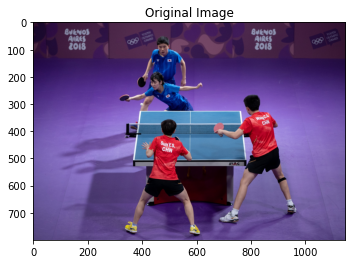

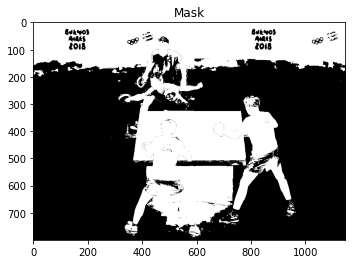

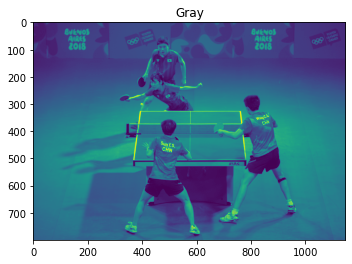

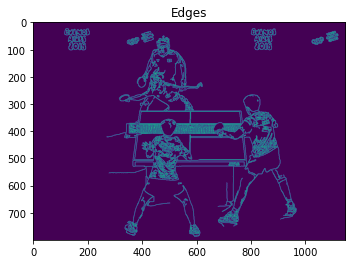

235
[[526 513 774 513]]
[[494 326 762 326]]
[[391 372 468 372]]
[[695 374 761 374]]


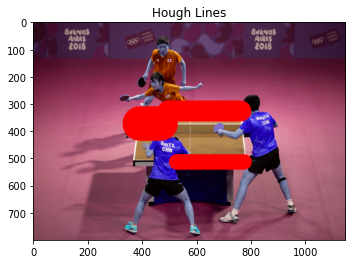

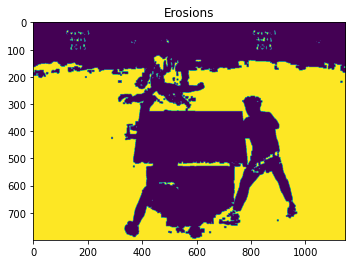

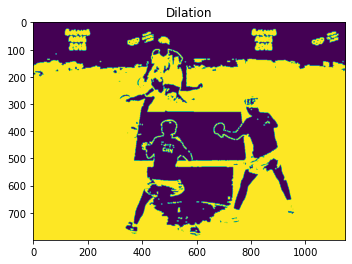

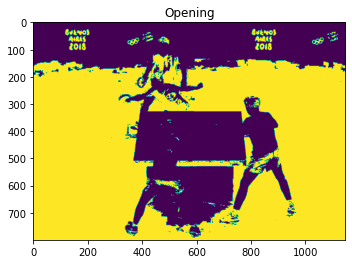

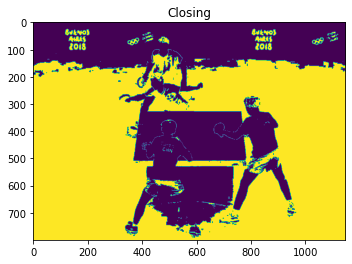

In [49]:
# USAGE
# python court_detection1.py --input input/kta_court.png
#
# author: Stephan Janssen
#

img_copy = img.copy()

# convert to HSV image
hsv_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2HSV)

# HARD CODED COURT COLOR :(
court_color = np.uint8([[[135,67,72]]])

hsv_court_color = cv2.cvtColor(court_color, cv2.COLOR_BGR2HSV)
hue = hsv_court_color[0][0][0]

# define range of blue color in HSV - Again HARD CODED! :(
lower_color = np.array([hue - 10,10,10])
upper_color = np.array([hue + 10,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv_img, lower_color, upper_color)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img_copy, img_copy, mask=mask)

# Show original image
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)) 
plt.title('Original Image') 
plt.show()

# Show masked image
plt.imshow(mask, cmap='Greys')
plt.title('Mask')
#plt.savefig('output/mask.jpg')
plt.show()

gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title("Gray")
plt.show() 

edges = cv2.Canny(gray, 50, 150, apertureSize = 3)
plt.imshow(edges)
plt.title("Edges")
plt.show() 

minLineLength = 100
maxLineGap = 5
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
print(len(lines))
print(lines[0])
print(lines[1])
print(lines[2])
print(lines[3])

# Green color in BGR 
LINE_COLOR = (255, 0, 0) 

for x1, y1, x2, y2 in lines[0]:
    # cv2.line(image, start_point, end_point, color, thickness)
    cv2.line(img_copy, (x1,y1), (x2,y2), LINE_COLOR, 55)

for x1, y1, x2, y2 in lines[1]:
    cv2.line(img_copy, (x1,y1), (x2,y2), LINE_COLOR, 75)

for x1, y1, x2, y2 in lines[2]:
    cv2.line(img_copy, (x1,y1), (x2,y2), LINE_COLOR, 125)

plt.imshow(img_copy)
plt.title('Hough Lines')
plt.show()

# Erosion
kernel = np.ones((2,2),np.uint8)
erosions2 = cv2.erode(mask, kernel, iterations = 5)
plt.imshow(erosions2)
plt.title('Erosions')
plt.show()

# Dilation
dilation = cv2.dilate(mask, kernel, iterations = 3)
plt.imshow(dilation)
plt.title('Dilation')
plt.show()

# Opening
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.title('Opening')
plt.show()

# Closing
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.title('Closing')
plt.show()